In [1]:
from __future__ import unicode_literals
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from helper_funcs import * 

import pandas as pd 
# prop = fm.FontProperties(fname='kalpurush ANSI.ttf')
# matplotlib.rcParams['font.family'] = prop.get_name()

import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.optim as optim

from numpy import linalg as LA

batch_size=13
random_state = 42 

In [23]:
def print_accuracy(testloader, net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels, _ = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

In [24]:
def get_class_accuracies(net):
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels, _ = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


    for i in range(10):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

In [4]:
def show_errors(testloader, net, n=10):
    count = 0
    ims = []
    preds = []
    actual = []
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)            
            
            for (im, pred, label) in zip(images, predicted, labels):
                if pred.numpy() != label.numpy():
                    count += 1
                    ims.append(im.numpy())
                    preds.append(pred)
                    actual.append(label)
                    
                if count >= n: 
                    return ims, preds, actual 
                
    plot_gallery2(ims, preds, 2, 5)

In [5]:
transform=transforms.Compose([transforms.ToTensor()])
dataset = BengaliDatasetMultiClass("../new_train.csv","../train", transform)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=13,
                                         shuffle=True, num_workers=0)

In [12]:
transform=transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
])

trainset = BengaliDataset("../train.csv","../trainsplit", transform)
testset = BengaliDataset("../test.csv","../testsplit", transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=13,
                                         shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=13,
                                         shuffle=True, num_workers=0)

df = pd.read_csv("../train-test.csv")
classes = list(range(df.label.max()+1))
n_classes = len(classes)

In [13]:
images, labels,t = next(iter(trainloader))
images, labels,t = next(iter(testloader))

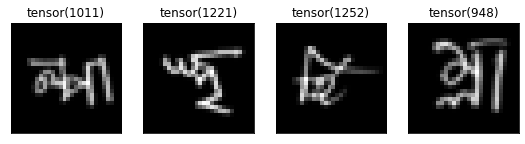

In [14]:
# show images
plot_gallery2(images,labels,1,4)

In [15]:
df.label.max()+1

1292

In [16]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Conv2d(1, 32, kernel_size=3, stride=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32*13*13, 100)
        self.fc2 = nn.Linear(100, n_classes)
        self.ReLU = nn.ReLU()
        
        self.last_hidden = None

    def forward(self, x):
        x = self.conv(x)
        x = self.ReLU(x)
        x = self.pool(x)
        x = x.view(batch_size, 32*13*13)
        x = self.ReLU(self.fc1(x))
        x = self.fc2(x)
        return x

    def get_last_hidden(self,x):
        x = self.pool(self.ReLU(self.conv(x)))
        x = x.view(-1, 32*13*13)
        x = self.ReLU(self.fc1(x))
        return x 
    
net = Net()
output = net(images)

In [17]:
output.shape

torch.Size([13, 1292])

In [20]:
# Training with MSE/Quadratic loss 
net_cr = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_cr.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels, _ = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net_cr(inputs)        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10000 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.004


KeyboardInterrupt: 

In [25]:
# CrossEntropyLoss model 
print_accuracy(testloader, net)

# Get 10 test set errors 
im, p, l = show_errors(testloader, net, n=10)
plot_gallery2(im, p, 2, 5)

KeyboardInterrupt: 

In [29]:
total = 0
correct = 0
with torch.no_grad():
    images, labels, _ = next(iter(testloader))
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

In [31]:
total, correct

(13, 0)